<a href="https://colab.research.google.com/github/ChitrarthVasdev/TASK-5-EXPLORATORY-DATA-ANALYSIS/blob/main/TASK_5_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 5 : EXPLORATORY DATA ANALYSIS(EDA)

# DOMAIN : DATA ANALYST

# LANGUAGE : PYTHON

# DATASET : TITANIC DATASET (train.csv)

In [ ]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Styling
sns.set(style='whitegrid', palette='muted')
%matplotlib inline

In [41]:
# LOAD THE DATASET
df = pd.read_csv('/content/train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
#INFO ABOUT THE DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
# SUMMARY STATISTICS
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
# DATA CLEANING FOR  EDA

# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Fare with median
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encode Sex as 0/1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Drop columns with too many missing or high cardinality
df.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

# Check if any missing remains
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [45]:
# VERIFYING THE DATA AFTER CLEANING
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [28]:
# VALUES COUNT FOR CATEGORICAL COLUMN
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n{'-'*40}")


Value counts for Embarked:
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
----------------------------------------


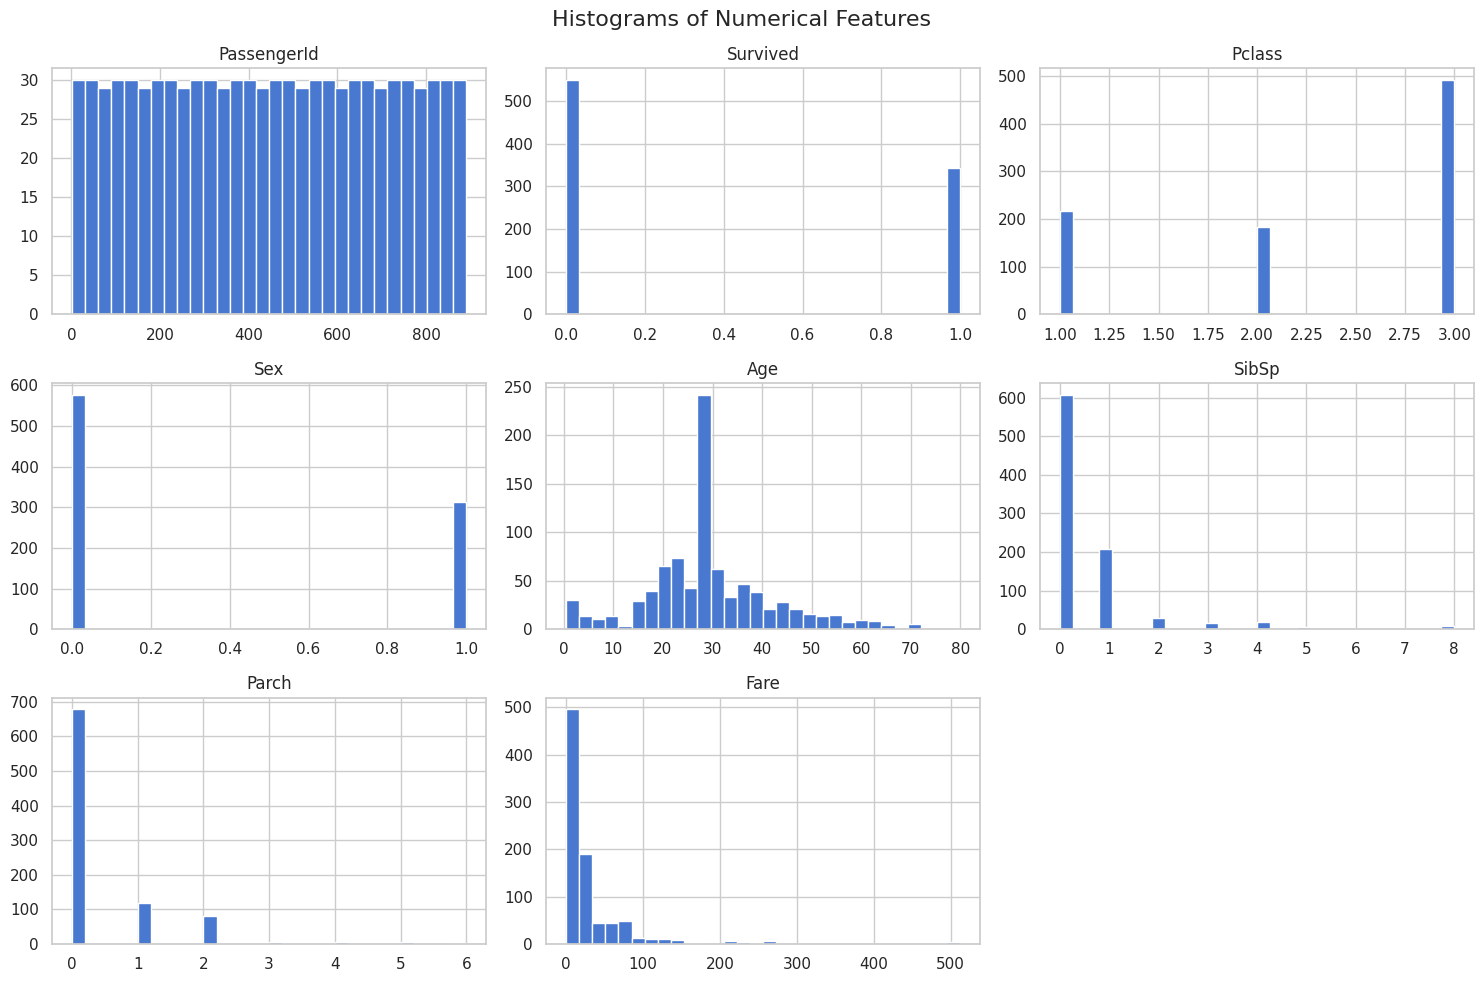

In [29]:
# HISTOGRAM FOR NUMERICAL VALUES
num_cols = df.select_dtypes(include=[np.number]).columns

df[num_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


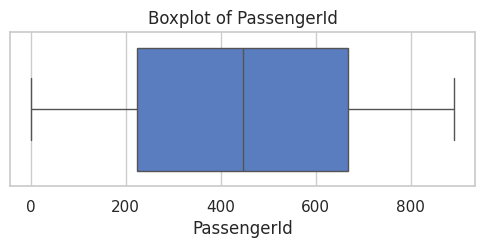

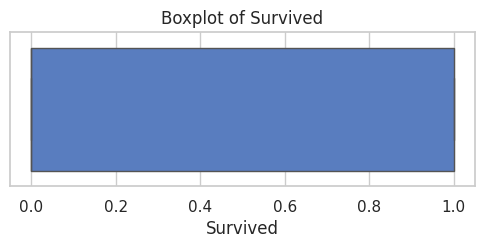

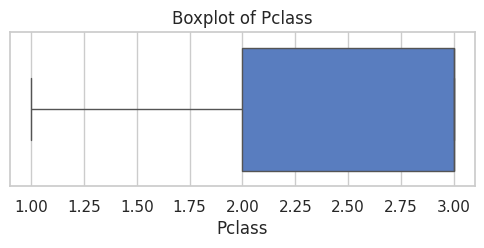

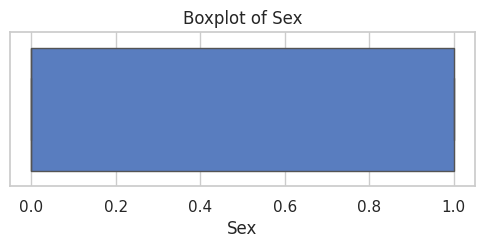

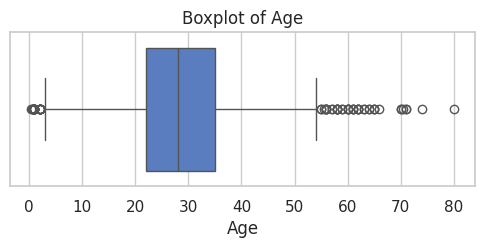

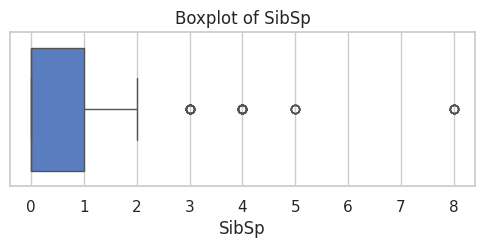

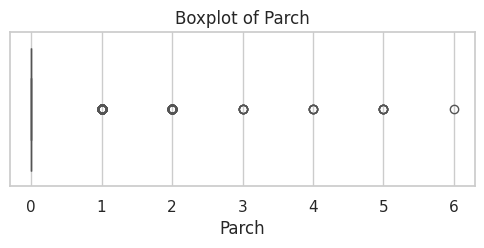

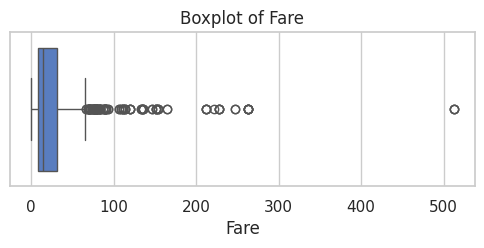

In [30]:
# BOXPLOT FOR OUTLIER DETECTION
for col in num_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


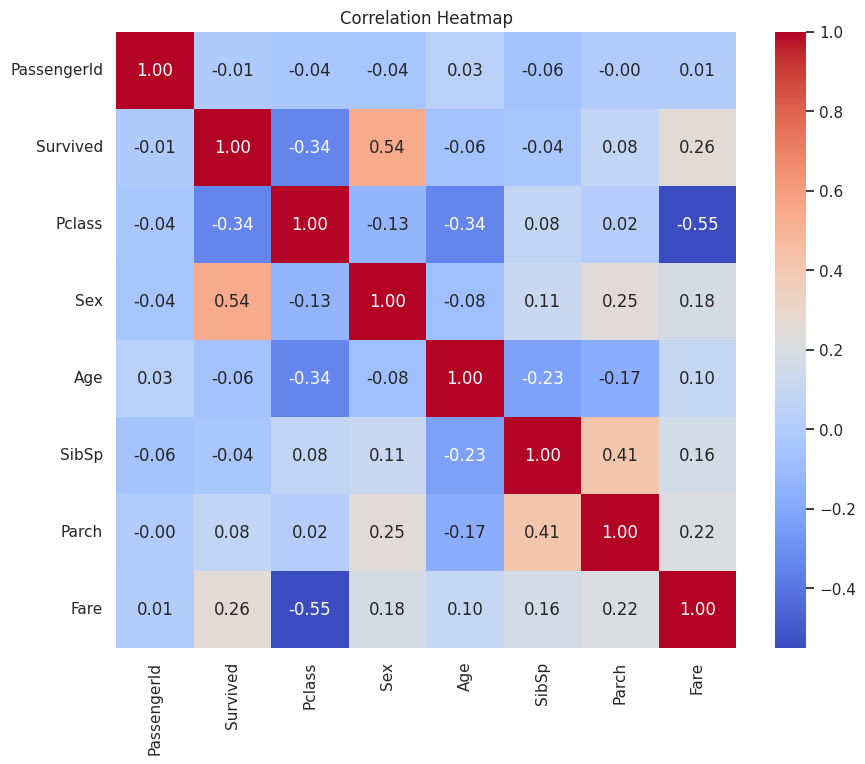

In [31]:
# CORRELATION HEATMAP
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


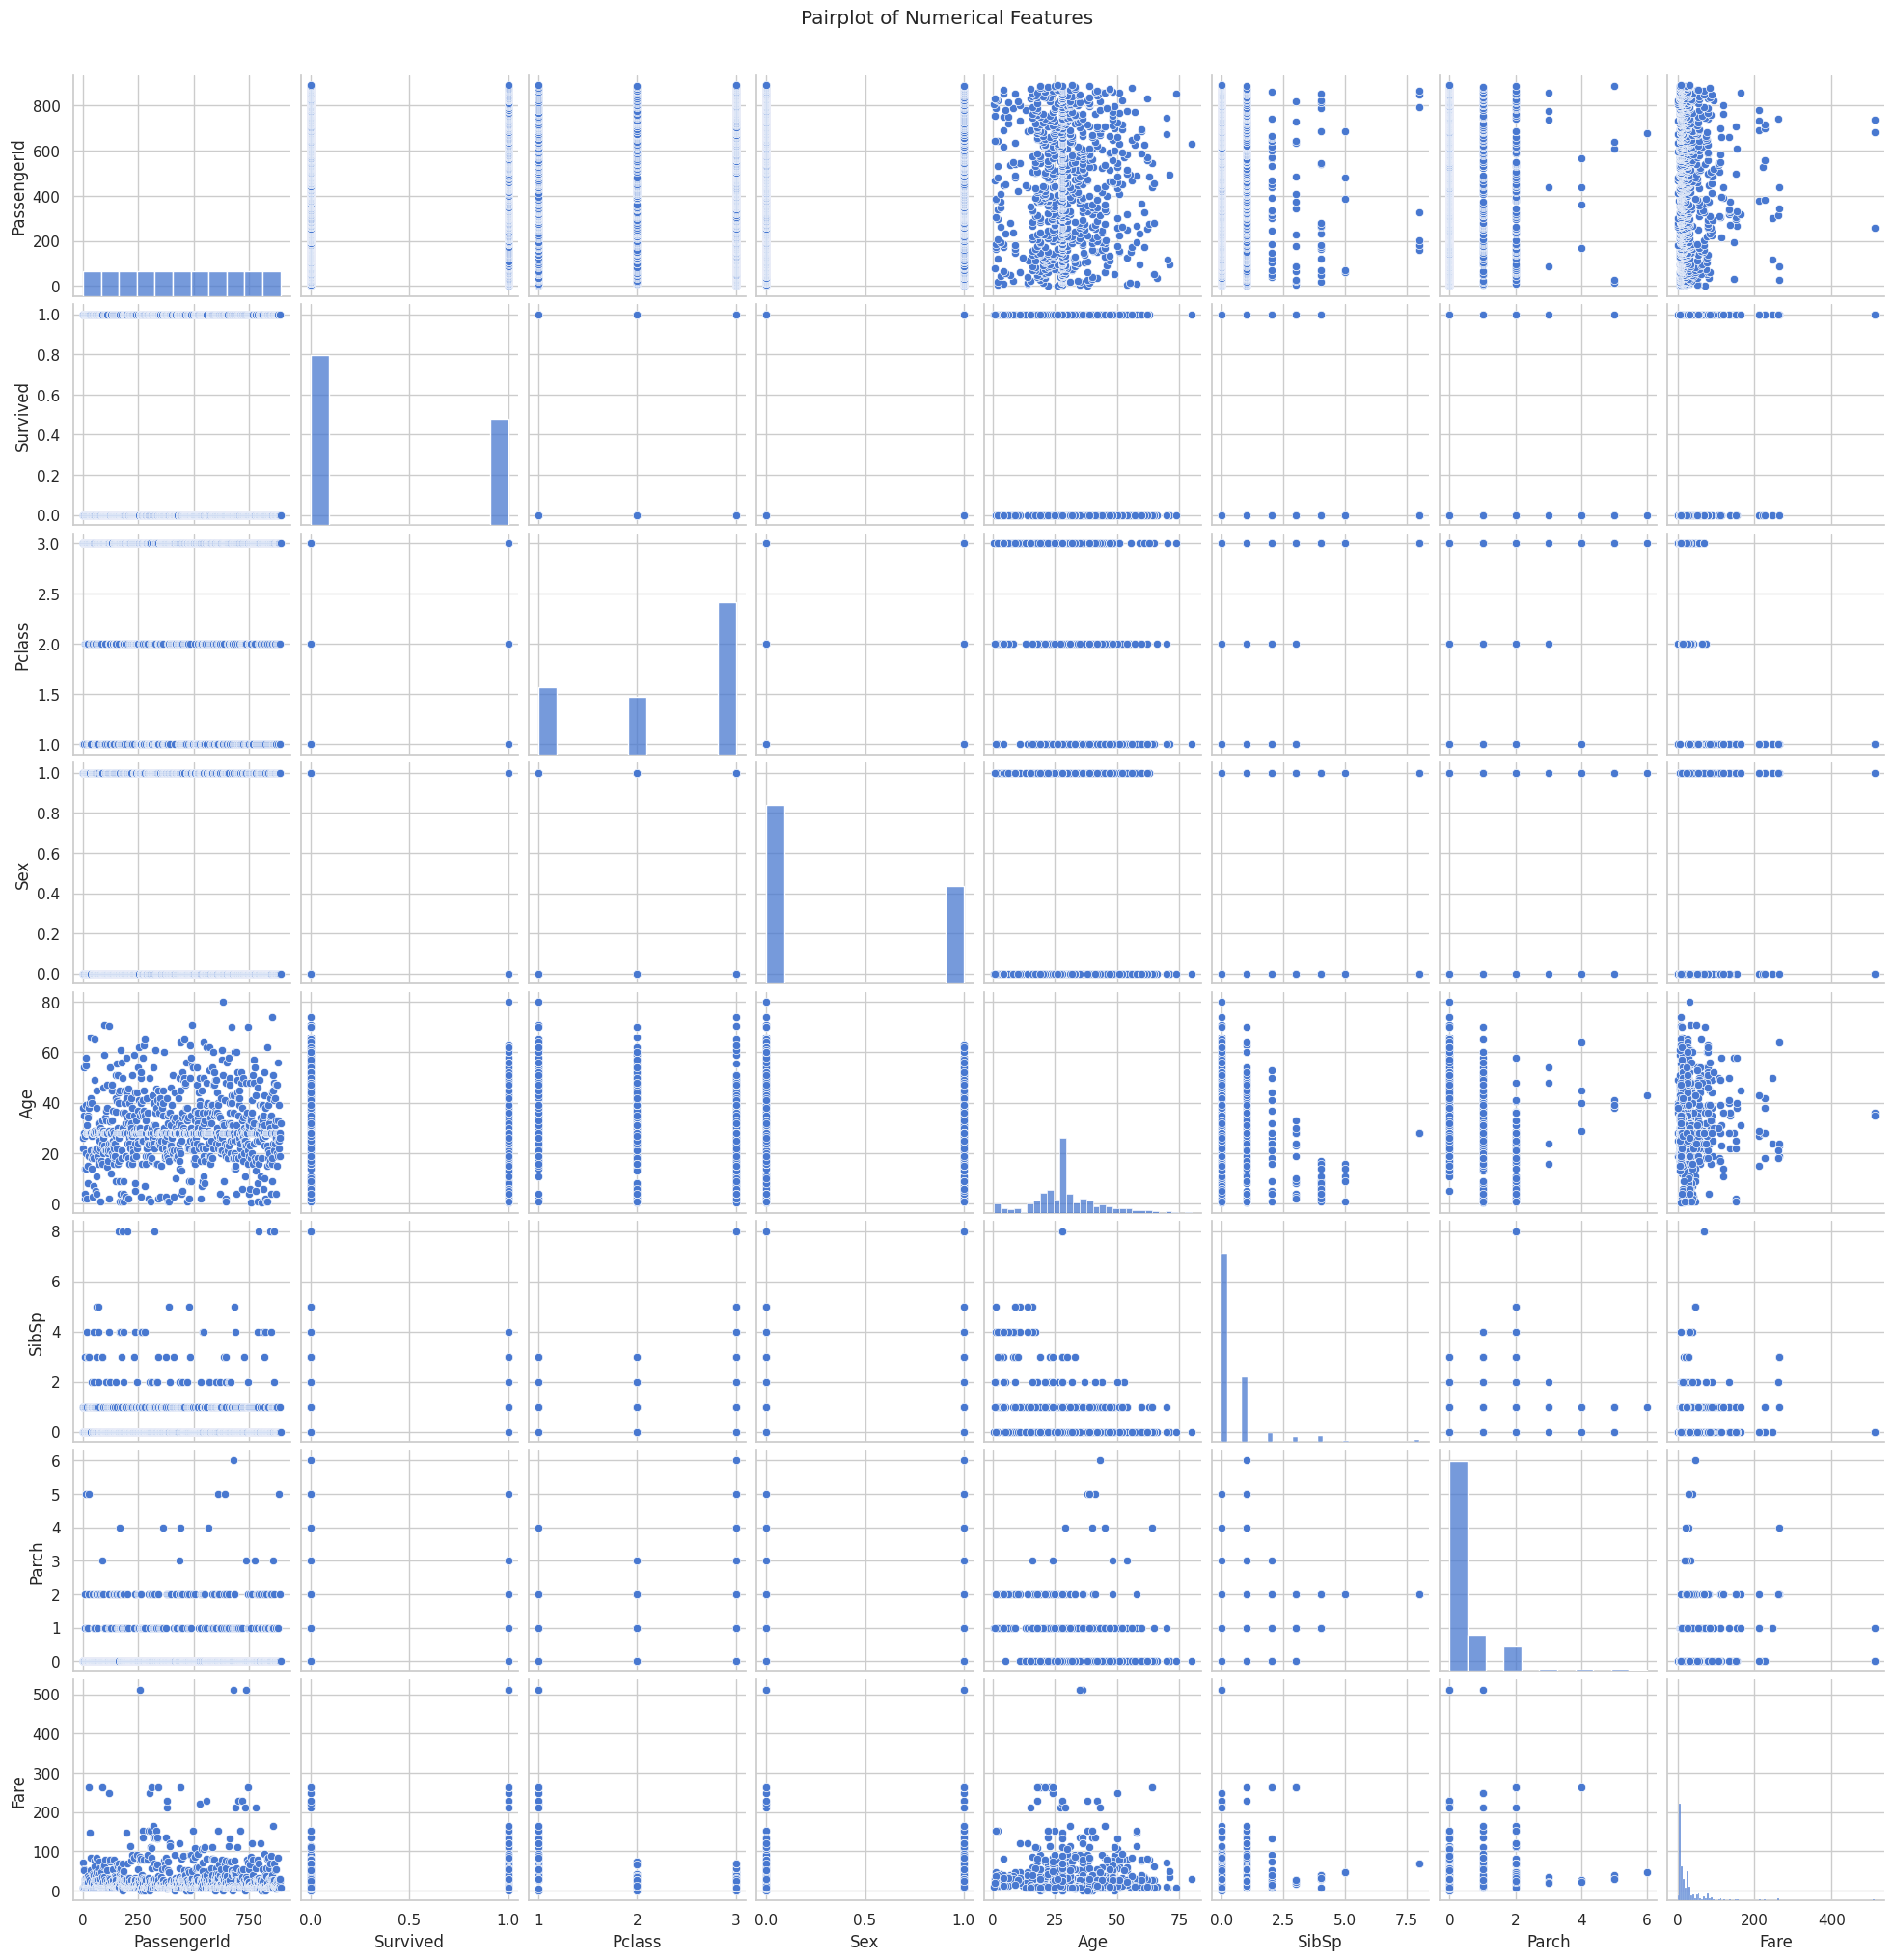

In [32]:
# PAIRPLOT
sns.pairplot(df[num_cols])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


In [33]:
target_col = 'Survived'


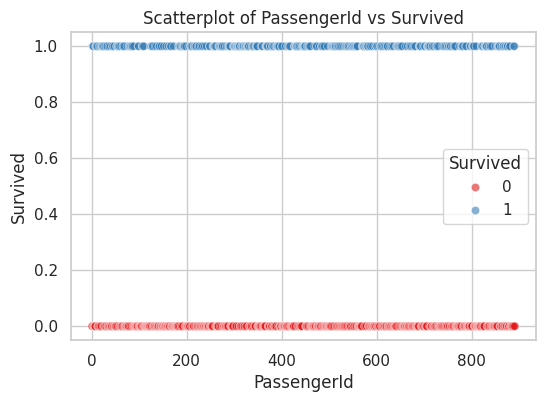

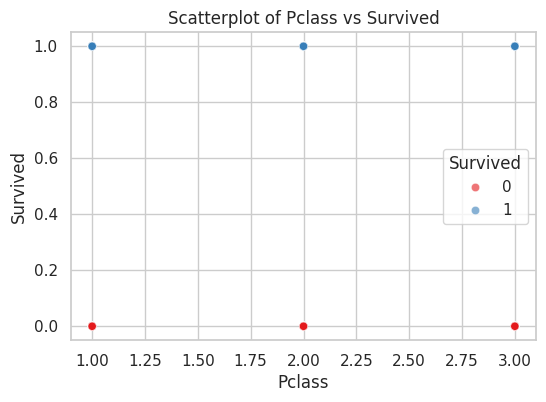

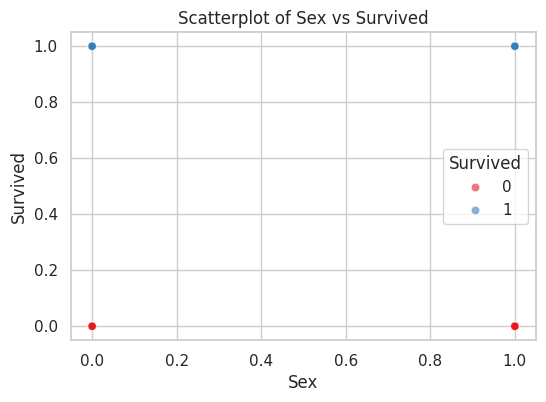

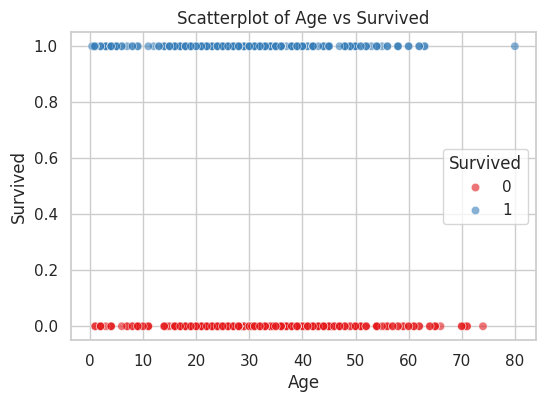

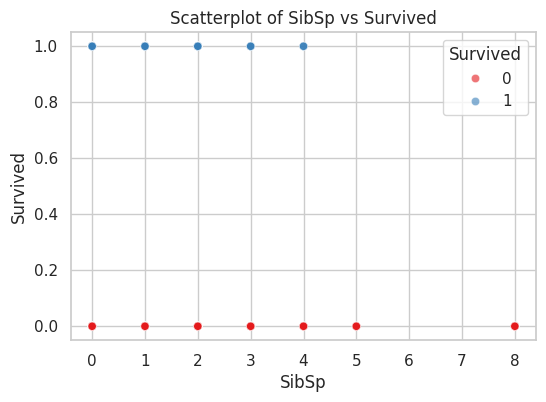

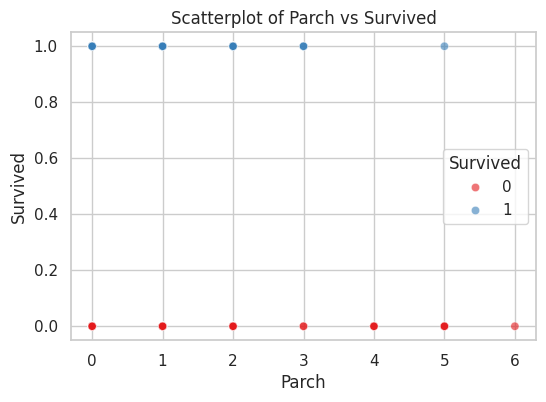

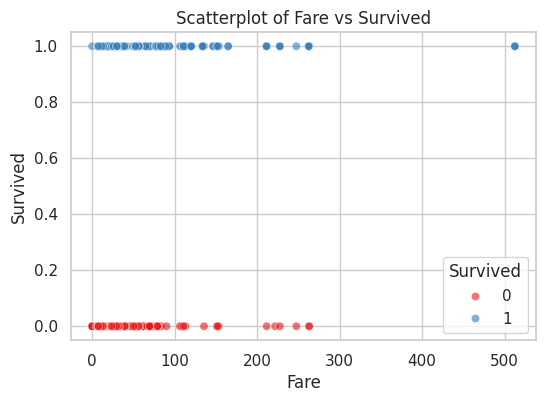

In [34]:
# SCATTERPLOT FOR FEATURES VS TARGET(SURVIVED)
for col in num_cols:
    if col != target_col:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(
            data=df,
            x=col,
            y=target_col,
            hue=target_col,
            palette='Set1',
            alpha=0.6
        )
        plt.title(f'Scatterplot of {col} vs {target_col}')
        plt.xlabel(col)
        plt.ylabel(target_col)
        plt.show()


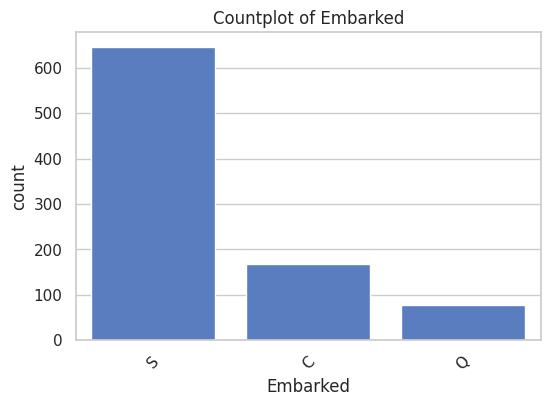

In [35]:
# COUNTPLOT FOR CATEGORICAL COLUMN
for col in cat_cols:
    if df[col].nunique() <= 10:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, data=df)
        plt.title(f'Countplot of {col}')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"Skipping column '{col}' (too many unique values: {df[col].nunique()})")


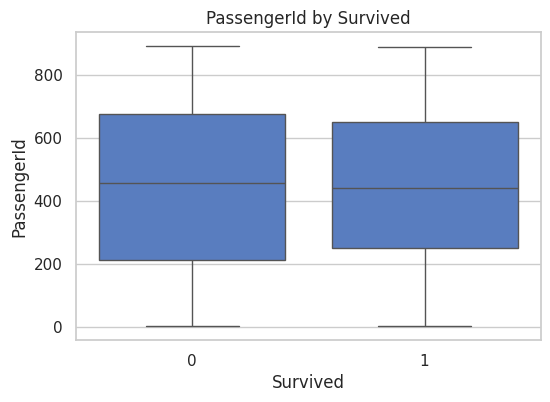

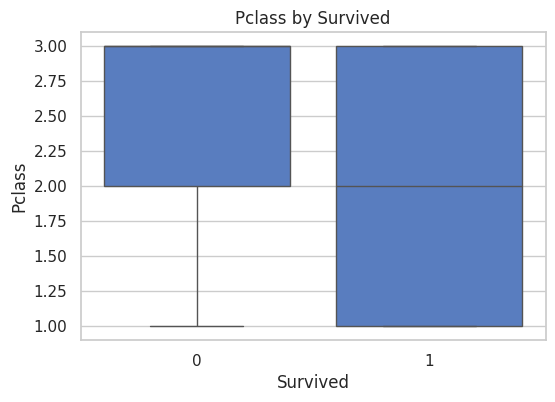

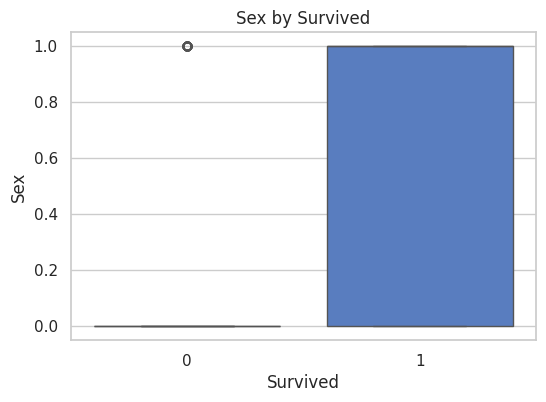

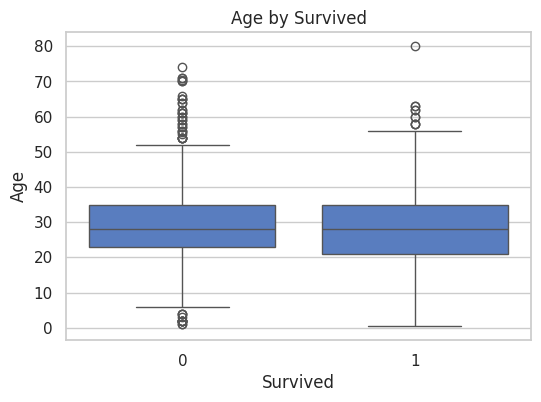

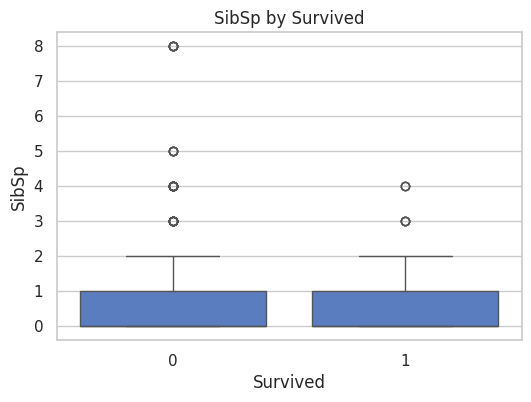

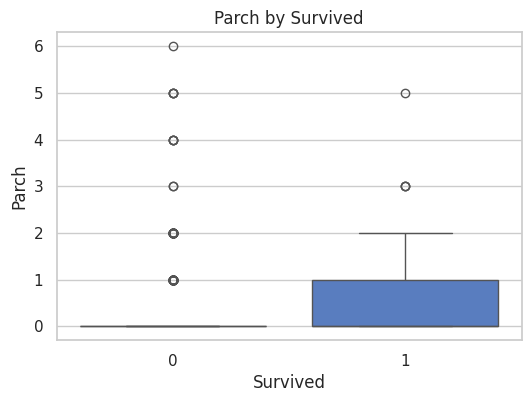

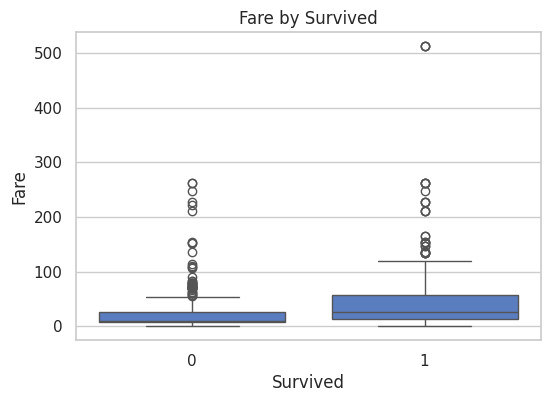

In [36]:
# BOXPLOTS OF NUMERICAL FEATURES BY TARGET
for col in num_cols:
    if col != target_col:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=target_col, y=col, data=df)
        plt.title(f'{col} by {target_col}')
        plt.show()


In [46]:
# Save cleaned dataset to CSV
df.to_csv('titanic_cleaned_dataset.csv', index=False)
print("✅ Cleaned dataset saved as 'titanic_cleaned_dataset.csv'")


✅ Cleaned dataset saved as 'titanic_cleaned_dataset.csv'
